In [2]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('Sleep_Health_Lifestyle_preprocessed.csv')

In [3]:
df

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Gender_Code,BMI_Code,Occupation_Code,Has_Sleep_Disorder,Sleep_Disorder_Code
0,1,27,6,6,42,6,77,4200,126,83,0,1,9,0,0
1,2,28,6,6,60,8,75,10000,125,80,0,0,1,0,0
2,3,28,6,6,60,8,75,10000,125,80,0,0,1,0,0
3,4,28,5,4,30,8,85,3000,140,90,0,2,6,1,2
4,5,28,5,4,30,8,85,3000,140,90,0,2,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,8,9,75,3,68,7000,140,95,1,1,5,1,2
370,371,59,8,9,75,3,68,7000,140,95,1,1,5,1,2
371,372,59,8,9,75,3,68,7000,140,95,1,1,5,1,2
372,373,59,8,9,75,3,68,7000,140,95,1,1,5,1,2


# Гипотезы для проверки:

🎯 Люди с высоким уровнем стресса (>7) спят меньше 6.5 часов

🎯 Врачи имеют ниже среднего качество сна

🎯 Физическая активность коррелирует с качеством сна

In [4]:
# Проверка гипотезы о стрессе и сне
high_stress_sleep = df[df['Stress Level'] > 7]['Sleep Duration'].mean()
print(f"Средняя продолжительность сна при высоком стрессе: {high_stress_sleep:.1f} ч")

# Сравнение качества сна врачей vs среднее
doctors_sleep = df[df['Occupation_Code'] == 1]['Quality of Sleep'].mean()
print(f"Качество сна врачей: {doctors_sleep:.1f} vs среднее: {df['Quality of Sleep'].mean():.1f}")

# Корреляция активности и сна
correlation = df[['Physical Activity Level', 'Quality of Sleep']].corr().iloc[0,1]
print(f"Корреляция: {correlation:.2f} (0 — нет связи, 1 — сильная прямая связь)")

Средняя продолжительность сна при высоком стрессе: 5.9 ч
Качество сна врачей: 6.6 vs среднее: 7.3
Корреляция: 0.19 (0 — нет связи, 1 — сильная прямая связь)


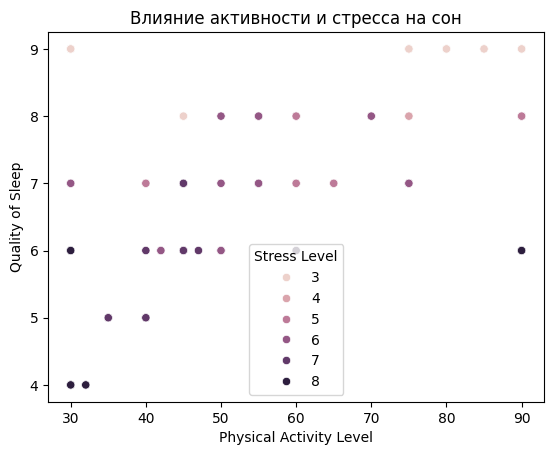

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='Physical Activity Level', y='Quality of Sleep', hue='Stress Level')
plt.title('Влияние активности и стресса на сон')
plt.savefig('activity_vs_sleep.png')  # Сохраняем автоматически
plt.show()

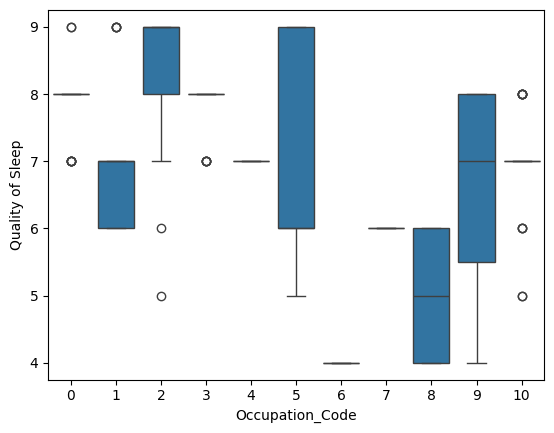

In [7]:
sns.boxplot(data=df, x='Occupation_Code', y='Quality of Sleep')
plt.savefig('Occupation_vs_sleep.png')

# Выявить скрытые паттерны в данных

Давление при высоком стрессе:
 Systolic_BP     132.242857
Diastolic_BP     87.457143
dtype: float64

Качество сна:
                      mean  count
Occupation_Code                 
False            7.468647    303
True             6.647887     71


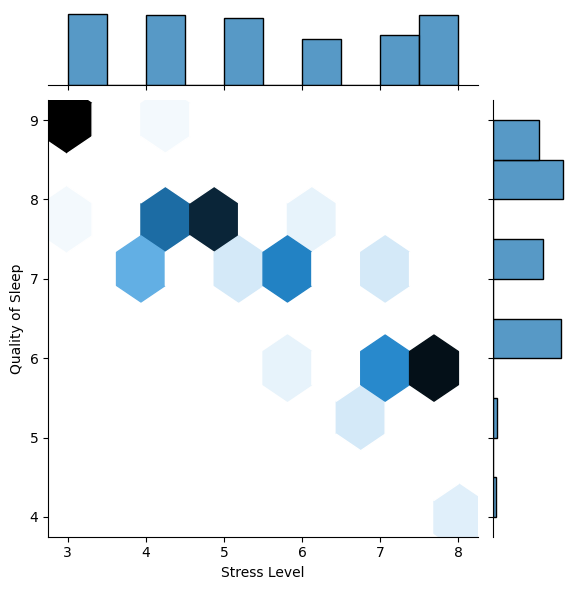

In [8]:
# 1. Связь стресса и давления
high_stress_bp = df[df['Stress Level'] > 7][['Systolic_BP', 'Diastolic_BP']].mean()
print("Давление при высоком стрессе:\n", high_stress_bp)

# 2. Сравнение врачей vs других профессий
doctors_vs_others = df.groupby(df['Occupation_Code'] == 1)['Quality of Sleep'].agg(['mean', 'count'])
print("\nКачество сна:\n", doctors_vs_others)

# 3. Визуализация
sns.jointplot(data=df, x='Stress Level', y='Quality of Sleep', kind='hex')
plt.savefig('stress_vs_sleep_hex.png')

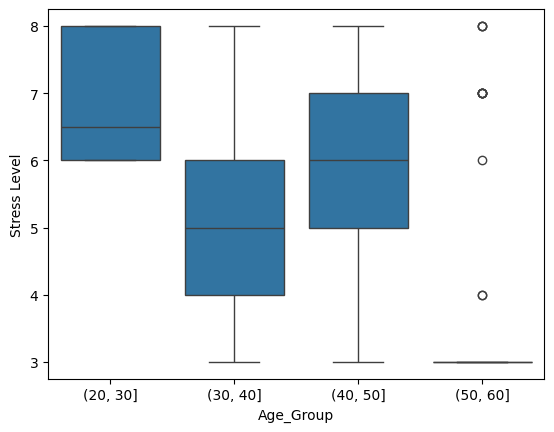

In [9]:
# Разделить на возрастные группы
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60])
sns.boxplot(data=df, x='Age_Group', y='Stress Level')
plt.savefig('age_Group.png')  # Сохраняем автоматически
plt.show()

Людей с высоким давлением и плохим сном: 2.1%


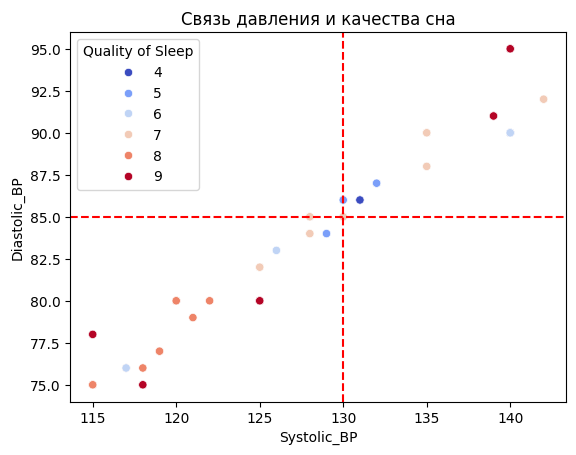

In [10]:
# Фильтр по давлению и качеству сна
high_bp_low_sleep = df[
    (df['Systolic_BP'] > 130) & 
    (df['Diastolic_BP'] > 85) & 
    (df['Quality of Sleep'] < 6)
]

# Расчет процента таких людей
percent = len(high_bp_low_sleep) / len(df) * 100
print(f"Людей с высоким давлением и плохим сном: {percent:.1f}%")

# Визуализация
sns.scatterplot(
    data=df, 
    x='Systolic_BP', 
    y='Diastolic_BP',
    hue='Quality of Sleep',
    palette='coolwarm'
)
plt.axvline(130, color='red', linestyle='--')
plt.axhline(85, color='red', linestyle='--')
plt.title('Связь давления и качества сна')
plt.savefig('bp_vs_sleep.png')
plt.show()

In [11]:
print("Средний пульс:", high_bp_low_sleep['Heart Rate'].mean())

Средний пульс: 82.125


In [12]:
print(high_bp_low_sleep['Occupation_Code'].value_counts())

Occupation_Code
6    2
5    2
8    2
9    1
2    1
Name: count, dtype: int64


Стресс как общий фактор:

In [13]:
stress_high = df[(df['Stress Level'] > 7) & (df['Quality of Sleep'] < 6)]
print(f"Людей с высоким стрессом и плохим сном: {len(stress_high)/len(df)*100:.1f}%")

Людей с высоким стрессом и плохим сном: 1.3%


Влияние профессии (на примере врачей):

In [14]:
doctors_high_bp = df[(df['Occupation_Code'] == 1) & (df['Systolic_BP'] > 130)]
print(f"Врачи с высоким давлением: {len(doctors_high_bp)/len(df[df['Occupation_Code'] == 1])*100:.1f}%")

Врачи с высоким давлением: 5.6%


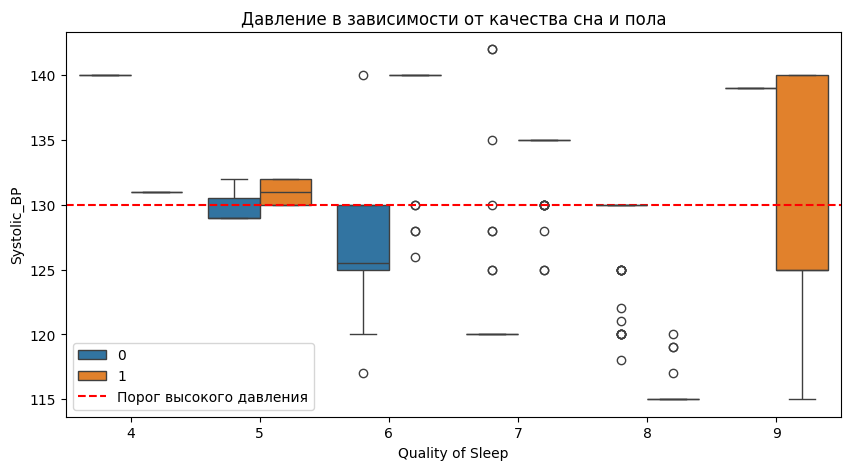

In [15]:
# График распределения давления у людей с разным качеством сна
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Quality of Sleep', y='Systolic_BP', hue='Gender_Code')
plt.title('Давление в зависимости от качества сна и пола')
plt.axhline(130, color='red', linestyle='--', label='Порог высокого давления')
plt.legend()
plt.savefig('bp_by_sleep_gender.png')
plt.show()

In [17]:
pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 4.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.6 MB 8.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.6 MB 9.8 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 10.5 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmode


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import statsmodels
print(statsmodels.__version__)  # Должно быть 0.13.0+

0.14.5


c:\Users\maksi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


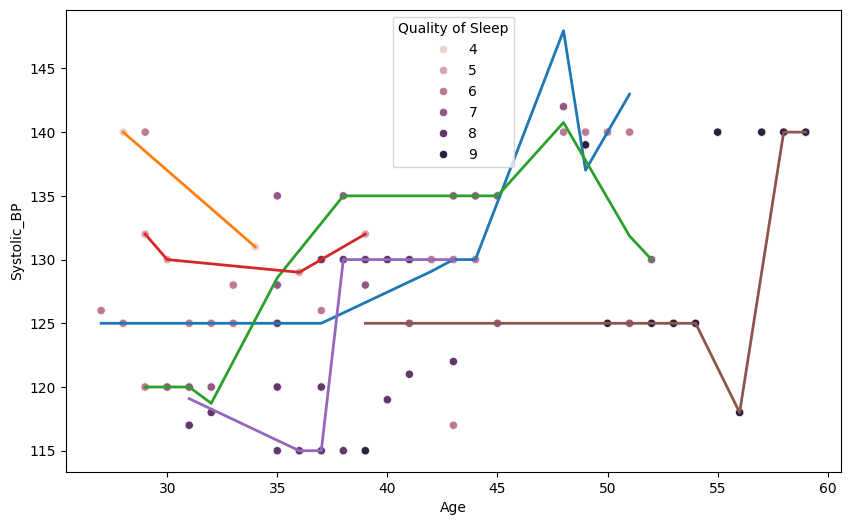

In [22]:
import statsmodels.api as sm

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Systolic_BP', hue='Quality of Sleep')

# LOWESS вручную
lowess = sm.nonparametric.lowess
for q in df['Quality of Sleep'].unique():
    subset = df[df['Quality of Sleep'] == q]
    smoothed = lowess(subset['Systolic_BP'], subset['Age'], frac=0.3)
    plt.plot(smoothed[:,0], smoothed[:,1], lw=2)

plt.savefig('manual_lowess.png')

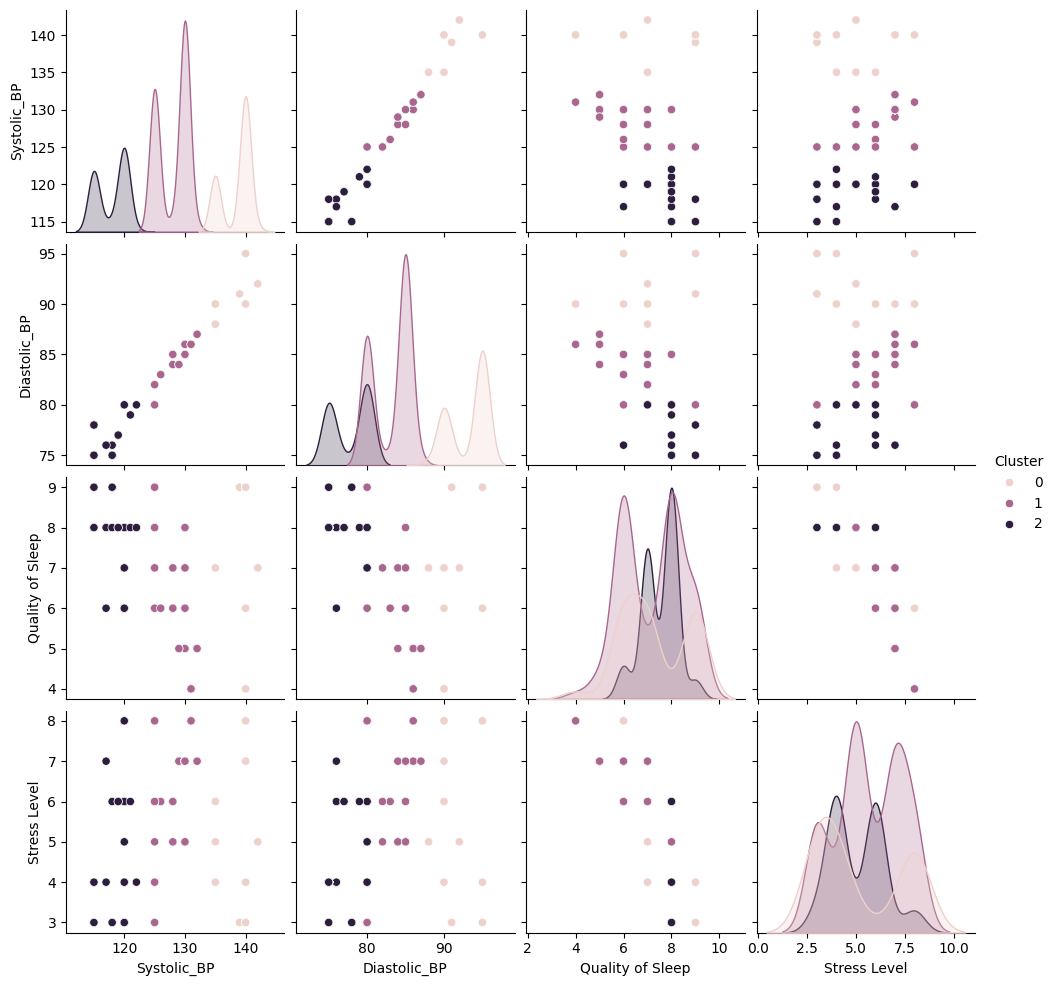

In [24]:
from sklearn.cluster import KMeans
X = df[['Systolic_BP', 'Diastolic_BP', 'Quality of Sleep', 'Stress Level']]
kmeans = KMeans(n_clusters=3).fit(X)
df['Cluster'] = kmeans.labels_
sns.pairplot(df, vars=X.columns, hue='Cluster')
plt.savefig('BP_sleep_stress.png')